# File to test gap_modules - simon 

## Importing modules and classes

In [1]:
# Using the model with the simplest descriptor, 2b - two body distance
from gap_models2 import GAPModel
from gap_descriptors import distance_2b

## Creating instances of models and descriptors

In [2]:
# Initialize distance_2_b descriptor
descriptor_2b = distance_2b(4,'ard_se',0.5,1.0,'uniform','T',10)

 distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 theta_uniform = 1.0 sparse_method = uniform add_species = T n_sparse = 10


In [3]:
# Make instances of GAPModel
model = GAPModel()


## Splitting up the Data into training data and test data

In [4]:
from gap_models2 import Split

In [5]:
# Create split object and pass in the data that needs to be split and the percentage of the training data 
data_file = "/Users/simon/simon_ml/GAP/hydrogen_md.xyz"
train_percentage = 0.8

split = Split(data_file, train_percentage)

In [6]:
# Get percentages 
split.get_percentages()

' Percentile of training data: 0.8 |  Percentile of test data: 0.19999999999999996 '

In [7]:
# Split up the data. Here the output_file_names need to be passed in order to avoid overwriting later. 
train_data_file = '2btrain_data_file.xyz'
test_data_file = '2btest_data_file.xyz'
split.split(train_data_file,test_data_file)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "energies" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


In [8]:
# Get the splitted data
train,test = split.get_splitted_data()


In [9]:
# Get the names of the data files containing the splitted data. These are needed for the model.train and 
# model.predict methods. 
train_data_file, test_data_file = split.get_splitted_data_files()


In [10]:
train_data_file

'2btrain_data_file.xyz'

## Training the model

In [12]:
# Getting the parameters
d2b_parameters = descriptor_2b.get_parameter_string()

# Choose training data and add
train_data_file 

# Choose test data
test_data_file

# Choose filename to be of trained GAP Potential. 
GAP_potential = '2bGAP.xml'

# Sigma for gap_fit, means how precise the classification is. Change sigma to prevent over-/underfitting
sigma = '0.1 0.1 0.1 0.0'
# Train the model
model.train(d2b_parameters,training_data=train_data_file,GAP_potential=GAP_potential,sigma=sigma)

# Print out file in which the potential is stored
model.get_potential_file()





 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = 2bGAP.xml at_file = '2btrain_data_file.xyz'  default_sigma = { 0.1 0.1 0.1 0.0 } gap = {  distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 theta_uniform = 1.0 sparse_method = uniform add_species = T n_sparse = 10}
libAtoms::Hello World: 03/03/2021   15:07:51
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 54471568
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_file = 2btrain_data_file.xyz
gap = " distance_2b cutoff = 4 covariance_type = ard_se delta = 0.5 theta_uniform = 1.0 sparse_method = unif

'/Users/simon/simon_ml/GAP/2bGAP.xml'

## Making predictions 

In [13]:
# Select which configuration you want to predict the energy for, let´s first predict energy and forces for 
# the training configuration. Secondly test the model on the test data, remember that both predictions are based 
# upon the same trained GAP Potential.

test_data_tr = train_data_file
test_data_te = test_data_file

# Get trained potential
GAP_potential = model.get_potential_file()


# Select filename in which predictions should be stored for train data 
QUIP_Prediction2b_tr = '2bquip_prediction_tr.xyz'


# Use predict method on training data and test data 
model.predict(Test_Data=test_data_tr, GAP_potential=GAP_potential, QUIP_Prediction=QUIP_Prediction2b_tr)
print(model.get_prediction_file())


# Select filename in which predictions should be stored for test data
QUIP_Prediction2b_te = '2bquip_prediction_te.xyz'

# Use predict method on test data as test data
model.predict(Test_Data=test_data_te, GAP_potential=GAP_potential, QUIP_Prediction=QUIP_Prediction2b_te)
print(model.get_prediction_file())

 quip E=T F=T  atoms_filename='2btrain_data_file.xyz'  param_filename='/Users/simon/simon_ml/GAP/2bGAP.xml' | grep AT | sed 's/AT//'  > 2bquip_prediction_tr.xyz 

/Users/simon/simon_ml/GAP/2bquip_prediction_tr.xyz
 quip E=T F=T  atoms_filename='2btest_data_file.xyz'  param_filename='/Users/simon/simon_ml/GAP/2bGAP.xml' | grep AT | sed 's/AT//'  > 2bquip_prediction_te.xyz 

/Users/simon/simon_ml/GAP/2bquip_prediction_te.xyz


## Plot real values against predicted values to see quality of the fit

In [14]:
from gapplot import QualityPlot
import matplotlib.pyplot as plt


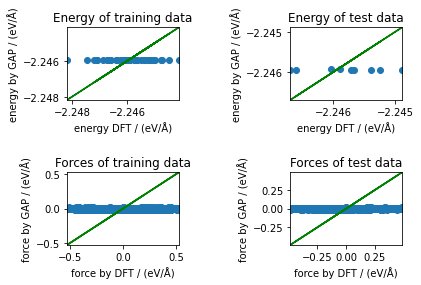

In [15]:
# Make instance of QualityPlot which contains the plot methods
# Make instance of plt.subplots object to make nice table of multiple subplots
QP = QualityPlot()
figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

# Plot energies and pass them on to axis object.
QP.energies_on_energies(real_values=test_data_tr, predicted_values=QUIP_Prediction2b_tr, axis=axs[0,0],label="Energy of training data")
QP.energies_on_energies(real_values=test_data_te,predicted_values=QUIP_Prediction2b_te, axis=axs[0,1], label="Energy of test data")

# Plot forces and pass them on to axis object.
QP.forces_on_forces(real_values=test_data_tr, predicted_values=QUIP_Prediction2b_tr, axis=axs[1,0],label="Forces of training data")
QP.forces_on_forces(real_values=test_data_te,predicted_values=QUIP_Prediction2b_te, axis=axs[1,1], label="Forces of test data")